# Line Curvature Calculation

Python implementation of following algorithm: \
https://stackoverflow.com/questions/49519816/calculating-the-curvature-of-a-closed-curve-or-polygon-in-matlab

<img src="https://i.stack.imgur.com/Rp1b9.png" width="400"/>

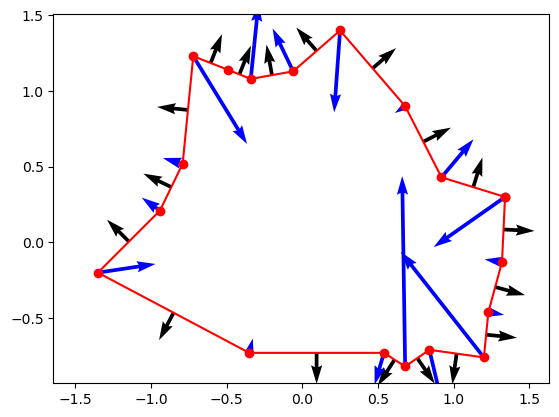

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([
        (1.34, 0.30), 
        (0.92, 0.43), 
        (0.68, 0.90), 
        (0.25, 1.40), 
        (-0.06, 1.13), 
        (-0.34, 1.08), 
        (-0.49, 1.14), 
        (-0.72, 1.23),
        (-0.79, 0.52), 
        (-0.94, 0.21), 
        (-1.35, -0.20), 
        (-0.35, -0.73), 
        (0.54, -0.73), 
        (0.68, -0.82), 
        (0.84, -0.71),
        (1.20, -0.76), 
        (1.23, -0.46), 
        (1.32, -0.13), 
        (1.34, 0.30),
    ])

x = points[:, 0]
y = points[:, 1]

# First derivative
dsx = np.diff(x)
dsy = np.diff(y)
ds = np.sqrt(dsx**2 + dsy**2)
Tx = dsx / ds
Ty = dsy / ds

# Second derivative & curvature
ds2 = 0.5 * (np.hstack((ds[-1], ds[:-1])) + ds)
Hx = np.diff(np.hstack((Tx[-1], Tx))) / ds2
Hy = np.diff(np.hstack((Ty[-1], Ty))) / ds2


# Plot
plt.figure()
plt.plot(x, y, 'ro-')
x = x[:-1]
y = y[:-1]  # remove repeated point
plt.quiver(x + dsx / 2, y + dsy / 2, Ty, -Tx, color='k', scale=16)
plt.quiver(x, y, Hx, Hy, color='b', scale=16)
plt.xlim(-2, 2)
plt.ylim(-1.5, 2)
plt.axis('equal')
plt.show()
